In [1]:
import ee
import geemap
import pandas as pd
import geemap.colormaps as cm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ee.Initialize()

In [3]:
#Import declare the shapefiles
Ndhiwa_shp = 'Ndhiwa.shp'
Plot_shp = 'plot.shp'
Plot = geemap.shp_to_ee(Plot_shp)
Ndhiwa = geemap.shp_to_ee(Ndhiwa_shp)

In [4]:
# Sugarcane planting period
# Sugar seasion = 20 months average

# start date
s_date = '2019-04-01' #change the date
# end date
e_date = '2021-01-30'

# modis NDVI collection/ filter by date
modis = ee.ImageCollection('MODIS/006/MOD13Q1').select('NDVI')
modis = modis.filterDate(s_date, e_date)

print('Number of dataset available within the specified =',modis.size().getInfo())

Number of dataset available within the specified = 42


In [5]:
Map = geemap.Map(center=(0.9613,34.6536),zoom=8)
Map

Map(center=[0.9613, 34.6536], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chil…

In [6]:
# Visualization color ramp
# palette = cm.palettes.ndvi
# ndvi_vis = {
#   'min': 0.0,
#   'max': 9000,
#   'palette': palette
# }

#Convert Imagecollection to bands
modis_ndvi_bands = modis.toBands()

#Clip to AOI
Ndhiwa_ndvi_clip = modis_ndvi_bands.clip(Ndhiwa)

#Display on map
Map.addLayer(Plot, name='Plots')
Map.addLayer(Ndhiwa_ndvi_clip, name='Ndhiwa NDVI')



In [7]:
#get the average NDVI per plot
modis_ndiv_pplot = modis_ndvi_bands.reduceRegions(Plot,reducer=ee.Reducer.mean(), scale =250).getInfo()

#subset the featurecollection
plot_feature = modis_ndiv_pplot['features']

#read as dataframe
df = pd.DataFrame(plot_feature)
df.head()

,type,geometry,id,properties
0,Feature,"{'type': 'Polygon', 'coordinates': [[[34.33138...",0,"{'2019_04_07_NDVI': 6276.648648648649, '2019_0..."
1,Feature,"{'type': 'Polygon', 'coordinates': [[[34.32737...",1,"{'2019_04_07_NDVI': 6165.380952380952, '2019_0..."
2,Feature,"{'type': 'Polygon', 'coordinates': [[[34.31373...",2,"{'2019_04_07_NDVI': 6196, '2019_04_23_NDVI': 7..."
3,Feature,"{'type': 'Polygon', 'coordinates': [[[34.31958...",3,"{'2019_04_07_NDVI': 6117.999999999999, '2019_0..."
4,Feature,"{'type': 'Polygon', 'coordinates': [[[34.31926...",4,"{'2019_04_07_NDVI': 6652, '2019_04_23_NDVI': 7..."


In [8]:
#from the dataframe extract on the NDVI attribute and the plot names
plot_properties = pd.Series(df['properties'])
plot_properties.head(10) #not yet suitable 

0    {'2019_04_07_NDVI': 6276.648648648649, '2019_0...
1    {'2019_04_07_NDVI': 6165.380952380952, '2019_0...
2    {'2019_04_07_NDVI': 6196, '2019_04_23_NDVI': 7...
3    {'2019_04_07_NDVI': 6117.999999999999, '2019_0...
4    {'2019_04_07_NDVI': 6652, '2019_04_23_NDVI': 7...
5    {'2019_04_07_NDVI': 6405, '2019_04_23_NDVI': 7...
6    {'2019_04_07_NDVI': 6257, '2019_04_23_NDVI': 7...
7    {'2019_04_07_NDVI': 6328.655172413793, '2019_0...
8    {'2019_04_07_NDVI': 6186.483516483517, '2019_0...
9    {'2019_04_07_NDVI': 6507.571428571428, '2019_0...
Name: properties, dtype: object

In [9]:
#Concatenate the multiple series and read as dataframe
plot_ndvi = pd.concat([pd.Series(x) for x in plot_properties], axis = 1)
#https://stackoverflow.com/questions/48811096/creating-a-dataframe-from-multiple-dictionaries
plot_ndvi #still not good enough

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
2019_04_07_NDVI,6276.648649,6165.380952,6196,6118.0,6652,6405,6257,6328.655172,6186.483516,6507.571429,...,6187,5734.862069,5919,6019,6626.222222,6722.044444,6859,6421.571429,6496.909091,6582
2019_04_23_NDVI,7578.135135,6919.238095,7636.333333,7009,7596,7722.62069,7556,7542.551724,7672.631868,7456.714286,...,6405,6454.241379,6971,7591,7586.648148,7583.177778,7558,7223,7072.181818,7341
2019_05_09_NDVI,7593.216216,7451.428571,7607.0,7432.043478,7765,7807.137931,7674,7599.810345,7599.923077,7667.285714,...,6781,6688.448276,7453,7801,7388.314815,7510.777778,7621,7368.714286,7966.545455,7486
2019_05_25_NDVI,8140.162162,7596,7872.833333,7691.304348,7947,8012.586207,8032,8146.258621,8110.978022,7891,...,7334,7382.448276,7920,7756,7888.0,7760.2,7814,7804.714286,7625.545455,7688
2019_06_10_NDVI,7764.837838,7472.857143,7231.0,7510.652174,5149,7461.034483,8360,7823.189655,7607.208791,7568,...,7711,7652.965517,7803,7369,7445.592593,7448.688889,7385,7308.285714,7380.636364,7338
2019_06_26_NDVI,7261.405405,6937.571429,6750.5,6806.304348,6845,6845,7213,7255.931034,7276.516484,7091.428571,...,6835,6854,7387,7242,7193.703704,7161.311111,7200,7119.285714,7182.727273,7178
2019_07_12_NDVI,7204.189189,6927.809524,7087.166667,6676.043478,6766,6919.724138,7200,7219.741379,7149.774725,7158,...,6147,6551.206897,6989,7077,7204.925926,7219.133333,7239,7097.142857,7132.0,7193
2019_07_28_NDVI,6799.702703,6479.857143,6226.5,6313.782609,6466,6485.172414,6805,6815.37931,6732.659341,6891.285714,...,5358,5440,6326,6331,6837.611111,6823.866667,6949,6856.285714,6913.909091,6716
2019_08_13_NDVI,5735.351351,5750.666667,5691.166667,5845.608696,5539,6059.793103,6031,5766.206897,5740.824176,5600.714286,...,5504,5446.724138,6001,5623,6215.074074,6222.444444,6331,6298.857143,6417.454545,6003
2019_08_29_NDVI,6752.621622,6776.47619,6629.333333,6631.391304,6741,6713.655172,6851,6772.155172,6720.148352,6733.142857,...,5597,5756.103448,5728,6245,6766.481481,6756.977778,7115,6732.714286,6855.454545,7049


In [10]:
#rearranging the dataframe struturce: plot labels as header
plot_ndvi.columns = plot_ndvi.iloc[42]
#remove the label row
plot_ndvi = plot_ndvi.drop(plot_ndvi.index[42])
plot_ndvi

Name,plot 1,plot 2,plot 3,plot 5,plot 6,plot 7,plot 8,plot 9,plot 10,plot 11,...,plot 62,plot 63,plot 64,plot 65,plot 66,plot 67,plot 68,plot 69,plot 70,plot 71
2019_04_07_NDVI,6276.648649,6165.380952,6196,6118.0,6652,6405,6257,6328.655172,6186.483516,6507.571429,...,6187,5734.862069,5919,6019,6626.222222,6722.044444,6859,6421.571429,6496.909091,6582
2019_04_23_NDVI,7578.135135,6919.238095,7636.333333,7009,7596,7722.62069,7556,7542.551724,7672.631868,7456.714286,...,6405,6454.241379,6971,7591,7586.648148,7583.177778,7558,7223,7072.181818,7341
2019_05_09_NDVI,7593.216216,7451.428571,7607.0,7432.043478,7765,7807.137931,7674,7599.810345,7599.923077,7667.285714,...,6781,6688.448276,7453,7801,7388.314815,7510.777778,7621,7368.714286,7966.545455,7486
2019_05_25_NDVI,8140.162162,7596,7872.833333,7691.304348,7947,8012.586207,8032,8146.258621,8110.978022,7891,...,7334,7382.448276,7920,7756,7888.0,7760.2,7814,7804.714286,7625.545455,7688
2019_06_10_NDVI,7764.837838,7472.857143,7231.0,7510.652174,5149,7461.034483,8360,7823.189655,7607.208791,7568,...,7711,7652.965517,7803,7369,7445.592593,7448.688889,7385,7308.285714,7380.636364,7338
2019_06_26_NDVI,7261.405405,6937.571429,6750.5,6806.304348,6845,6845,7213,7255.931034,7276.516484,7091.428571,...,6835,6854,7387,7242,7193.703704,7161.311111,7200,7119.285714,7182.727273,7178
2019_07_12_NDVI,7204.189189,6927.809524,7087.166667,6676.043478,6766,6919.724138,7200,7219.741379,7149.774725,7158,...,6147,6551.206897,6989,7077,7204.925926,7219.133333,7239,7097.142857,7132.0,7193
2019_07_28_NDVI,6799.702703,6479.857143,6226.5,6313.782609,6466,6485.172414,6805,6815.37931,6732.659341,6891.285714,...,5358,5440,6326,6331,6837.611111,6823.866667,6949,6856.285714,6913.909091,6716
2019_08_13_NDVI,5735.351351,5750.666667,5691.166667,5845.608696,5539,6059.793103,6031,5766.206897,5740.824176,5600.714286,...,5504,5446.724138,6001,5623,6215.074074,6222.444444,6331,6298.857143,6417.454545,6003
2019_08_29_NDVI,6752.621622,6776.47619,6629.333333,6631.391304,6741,6713.655172,6851,6772.155172,6720.148352,6733.142857,...,5597,5756.103448,5728,6245,6766.481481,6756.977778,7115,6732.714286,6855.454545,7049


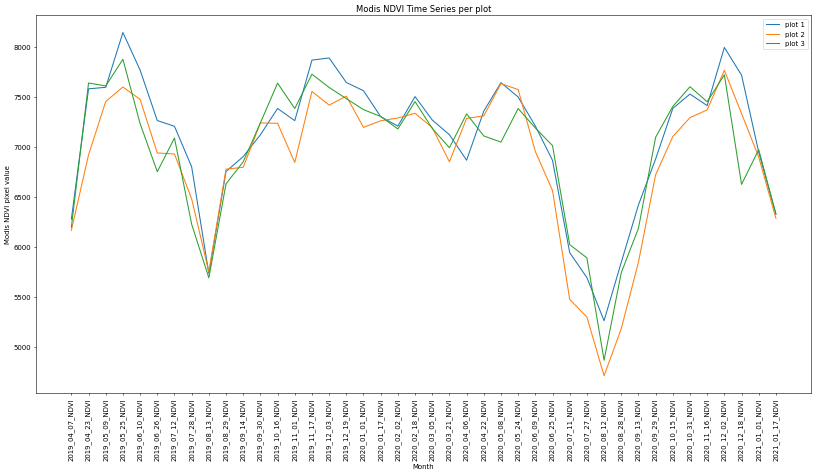

In [11]:
fig, ax =plt.subplots(figsize=(20,10), dpi=50)

#plot data
ax.plot(plot_ndvi['plot 1'])
ax.plot(plot_ndvi['plot 2'])
ax.plot(plot_ndvi['plot 3'])
#Label plot
ax.set(title="Modis NDVI Time Series per plot",
        xlabel='Month',
        ylabel='Modis NDVI pixel value')
ax.legend(plot_ndvi)
ax.tick_params(axis='x', rotation=90)
fig.savefig('modis.png', dpi=60)